# World Happiness Report Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('DataForTable2.1WHR2023.xls')
df

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018     3.616480            7.783066        0.775388   
2195     Zimbabwe  2019     2.693523            7.697755        0.759162   
2196     Zimbabwe  2020     3.159802            7.596050        0.717243   
2197     Zimbabwe  2021     3.154578            7.656878        0.685151   
2198     Zimbabwe  2022     3.296220            7.670123        0.666172   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2194                         52.625000                      0.762675   
2195                         53.099998                      0.631908   
2196                         53.575001                      0.643303   
2197                         54.049999                      0.667636   
2198                         54.525002                      0.651987   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.167652                   0.881686         0.414297         0.258195  
1       0.190809                   0.850035         0.481421         0.237092  
2       0.121316                   0.706766         0.516907         0.275324  
3       0.163571                   0.731109         0.479835         0.267175  
4       0.237588                   0.775620         0.613513         0.267919  
...          ...                        ...              ...              ...  
2194   -0.051219                   0.844209         0.657524         0.211726  
2195   -0.047464                   0.830652         0.658434         0.235354  
2196    0.006313                   0.788523         0.660658         0.345736  
2197   -0.075575                   0.756945         0.609917         0.241682  
2198   -0.069513                   0.752632         0.640609         0.191350  

[2199 rows x 11 columns]

# Question 1: Data Quality Report

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [17]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [16]:
df['Country name'].value_counts()

Country name
Zimbabwe      17
Vietnam       17
Tanzania      17
Thailand      17
Bangladesh    17
              ..
Maldives       1
Oman           1
Cuba           1
Suriname       1
Guyana         1
Name: count, Length: 165, dtype: int64

In [78]:
df[df['Country name'] == 'Oman']

Country name  year  Life Ladder  Log GDP per capita  Social support  \
1485         Oman  2011     6.852982            10.53862             NaN   

      Healthy life expectancy at birth  Freedom to make life choices  \
1485                             62.34                      0.916293   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
1485    0.009673                        NaN              NaN         0.295164

In [80]:
df[df['Country name'] == 'Maldives']

Country name  year  Life Ladder  Log GDP per capita  Social support  \
1207     Maldives  2018     5.197575            9.892906        0.913315   

      Healthy life expectancy at birth  Freedom to make life choices  \
1207                         69.775002                      0.854759   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
1207    0.015678                        NaN              NaN              NaN

In [79]:
df[df['Country name'] == 'Cuba']

Country name  year  Life Ladder  Log GDP per capita  Social support  \
475         Cuba  2006     5.417869                 NaN        0.969595   

     Healthy life expectancy at birth  Freedom to make life choices  \
475                              68.0                      0.281458   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
475         NaN                        NaN         0.596187         0.276602

In [18]:
df.year.min()

2005

In [19]:
df.year.max()

2022

Other resources from the WHR website used:
https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf

The appendix above includes descriptions of the different columns as well as some details on how the data was gathered.

The dataset includes ~2200 yearly entries for happiness and related metrics for 165 different countries.  Some countries have more entries starting as far back as 2005, while others only have a single entry for a single year, and in some cases from a quite a while ago (ex. Cuba's only row is from 2006).

Most of the data, except for year and country name, are numeric (floats).

### Data features (columns)
1. Country name - a string, as expected
2. year - an integer
3. Life Ladder - Per the statistical appendix, life ladder is the overall happiness score of a country, measured on a scale of 0-10, based on the average response to the question, "how would you rate your current life from 0 to 10, with 0 being the worst and 10 being the best?"

As can be seen above, these first three columns have no missing values in any of the rows (i.e. there is a happiness score for every country/year combo in the dataset).

The rest of the columns contain varying amounts of missing values, ranging from ~1% missing (social support) to ~5% missing (perceptions of corruption).

4. Log GDP per capita - the log of gdp per capita.  Data comes from a mix of sources including World Development Indicators, Penn World Table 10.01, and some extrapolation using expected growth rates for the year 2022 (real data for 2022 wasn't available yet when the data was published)
5. Social support - average response to the question "do you have people you could rely on when you are in trouble?" (yes or no, 0 or 1, the average of responses)
6. Healthy life expectancy at birth - life expectancy measured in years
7. Freedom to make life choices - average of yes (1) or no (0) responses to questions surrounding freedom of choice
8. Generosity - the residual ? (not sure what that is) of regressing responses to binary questions about donating to charity recently
9. Corruption perception - average of binary responses to questions about how corrupt a country is percieved to be
10. Positive affect - average of responses to questions about experiencing positive emotions within the last day
11. Negative affect - average of responses to questions about experiencing negative emotions within the last day


In [3]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2199.000000  2199.000000         2179.000000     2186.000000   
mean   2014.161437     5.479226            9.389766        0.810679   
std       4.718736     1.125529            1.153387        0.120952   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.499764        0.746609   
50%    2014.000000     5.432437            9.498955        0.835535   
75%    2018.000000     6.309460           10.373216        0.904792   
max    2022.000000     8.018934           11.663788        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2145.000000                   2166.000000   
mean                          63.294583                      0.747858   
std                            6.901104                      0.140150   
min                            6.720000                      0.257534   
25%                           59.119999                      0.656528   
50%                           65.050003                      0.769821   
75%                           68.500000                      0.859382   
max                           74.474998                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  2126.000000                2083.000000      2175.000000   
mean      0.000096                   0.745195         0.652143   
std       0.161083                   0.185837         0.105922   
min      -0.337527                   0.035198         0.178886   
25%      -0.112116                   0.688139         0.571684   
50%      -0.022671                   0.799654         0.663063   
75%       0.092070                   0.868827         0.737936   
max       0.702708                   0.983276         0.883586   

       Negative affect  
count      2183.000000  
mean          0.271501  
std           0.086875  
min           0.082737  
25%           0.207660  
50%           0.260671  
75%           0.322894  
max           0.704590

## Univariate relationships

Sources:
https://www.statology.org/how-to-report-skewness-kurtosis/

### Data distribution for the year

Interesting to see if any particular years have more recorded data than others.
Seems there is more data for 2010, 2016, and 2022 than other years

<Axes: xlabel='year', ylabel='Count'>

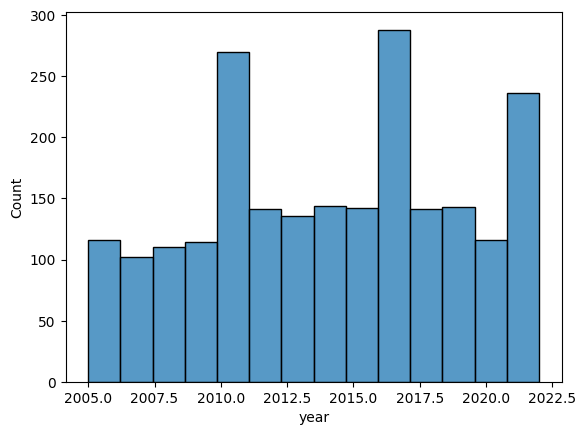

In [41]:
sns.histplot(df.year)

### Life Ladder (Happiness)

The data for life ladder isn't quite normal.  Has some left skew as well as negative kurtosis,
indicating the data is grouped more closely to the middle (less data in the tails) than a normal distribution.

<Axes: xlabel='Life Ladder', ylabel='Count'>

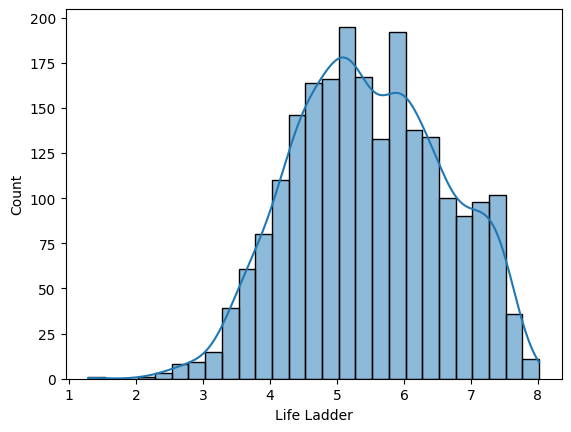

In [21]:
sns.histplot(df['Life Ladder'], kde=True) 

In [44]:
df['Life Ladder'].skew()

-0.017819331787346102

In [45]:
df['Life Ladder'].kurt()

-0.5918479723083578

### Log GDP per capita

Similar to life ladder, skewed to the left and negative kurtosis indicating not quite normal.

<Axes: xlabel='Log GDP per capita', ylabel='Count'>

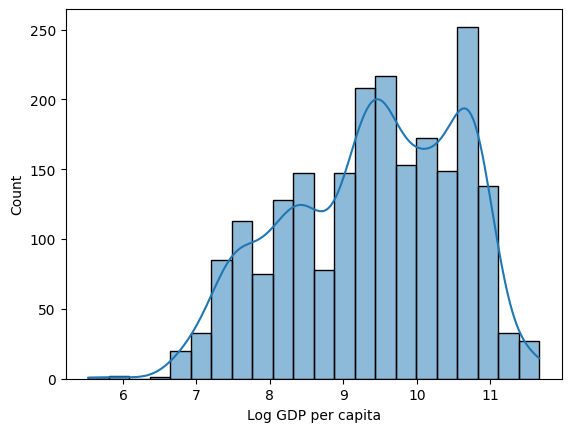

In [28]:
sns.histplot(df['Log GDP per capita'], kde=True)

In [62]:
df['Log GDP per capita'].skew()

-0.33512982276196995

In [63]:
df['Log GDP per capita'].kurt()

-0.7730364850582307

### Social support

Social support is closer to the shape of a normal distribution (kurtosis closer to 3), but also even more heavily left skewed.

<Axes: xlabel='Social support', ylabel='Count'>

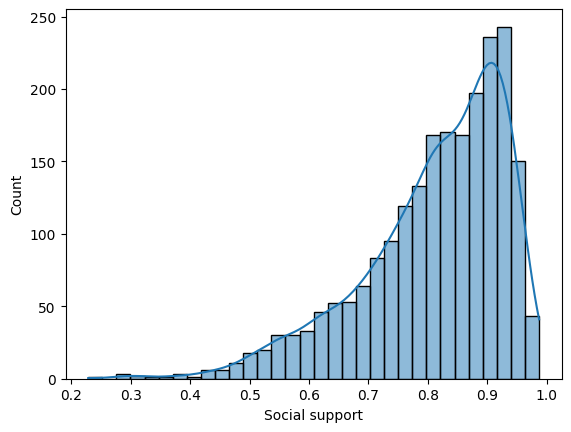

In [29]:
sns.histplot(df['Social support'], kde=True)

In [42]:
df['Social support'].skew()

-1.1188344045866705

In [43]:
df['Social support'].kurt()

1.1739089147806463

### Life expectancy

Left skewed again, the reason for that is explained more below.  Apart from that, a kurtosis of 2.99 indicates very close to a normal distribution.  Although, looking at the plot, seems like there are almost two peaks, one around 54 and other around 67.  Not sure how to describe a distribution like that.

<Axes: xlabel='Healthy life expectancy at birth', ylabel='Count'>

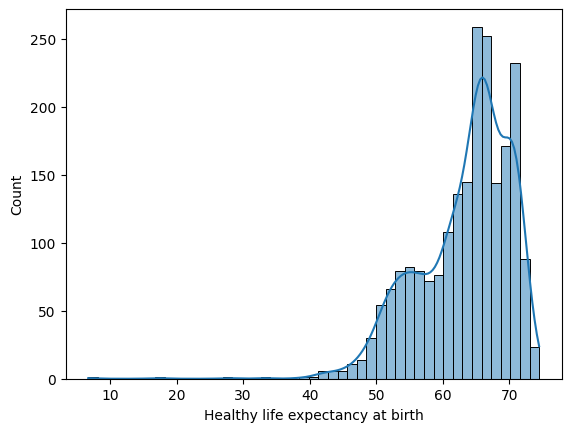

In [30]:
sns.histplot(df['Healthy life expectancy at birth'], kde=True) # Seems like there are some strange outliers
                                                               # in life expectancy, 10 years expected seems ridiculously low

In [49]:
df['Healthy life expectancy at birth'].skew()

-1.1454543057254836

In [48]:
df['Healthy life expectancy at birth'].kurt()

2.9896602355599575

In [23]:
df[df['Healthy life expectancy at birth'] < 40] # Investigating to see where the low life expectancy numbers are coming from

Country name  year  Life Ladder  Log GDP per capita  Social support  \
766        Haiti  2006     3.754156            7.972617        0.693801   
767        Haiti  2008     3.846329            8.012043        0.679098   
768        Haiti  2010     3.765999            7.983535        0.554031   
769        Haiti  2011     4.844574            8.022003        0.567039   
770        Haiti  2012     4.413475            8.011640        0.748663   

     Healthy life expectancy at birth  Freedom to make life choices  \
766                          6.720000                      0.449475   
767                         17.360001                      0.464971   
768                         28.000000                      0.372941   
769                         33.320000                      0.412588   
770                         38.639999                      0.482486   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
766    0.358533                   0.853506         0.583196         0.332141  
767    0.216526                   0.811659         0.572523         0.255774  
768    0.170872                   0.848007         0.495069         0.292557  
769    0.197880                   0.681960         0.550258         0.244856  
770    0.246083                   0.717166         0.556583         0.283806

<Axes: xlabel='year', ylabel='Healthy life expectancy at birth'>

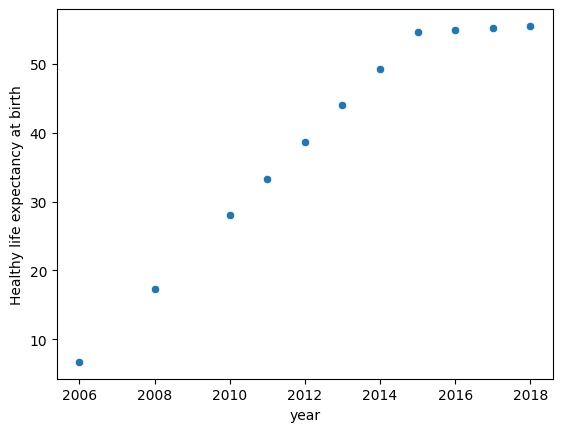

In [4]:
# Seems very strange and artificial for a country to have such a steep linear increase in life expectancy in such
# a short time period
sns.scatterplot(df[df['Country name'] == 'Haiti'], x='year', y='Healthy life expectancy at birth')

### Life expectancy strangeness

After looking into the statistical appendix and doing some external research, I believe this can be explained.

Per the appendix they used the World Heath Organization's life expectancy data, which only includes data points for the years 2000, 2010, 2015, and 2019.  They used interpolation and extrapolation to fill out the rest of the data set.

Haiti experienced a sudden sharp drop in life expectancy in 2010 due to the 2010 Haiti Earthquake, returning closer to the previous normal life expectancy in the years after, including 2015.  In this case the WHR's method of extrapolating life expectancies (a straight line between 2010 and 2015) lead to meaningless values for anything before 2010.

This is an extreme case, but in general I would be cautious of the rest of the life expectancy results given the limited data points and method of padding the data.

Sources:

https://datacommons.org/tools/timeline#&place=country/HTI&statsVar=LifeExpectancy_Person

https://www.britannica.com/event/2010-Haiti-earthquake

### Freedom to make life choices

Same store as many other columns before, left skewed and not quite normal, more data grouped towards the center.

<Axes: xlabel='Freedom to make life choices', ylabel='Count'>

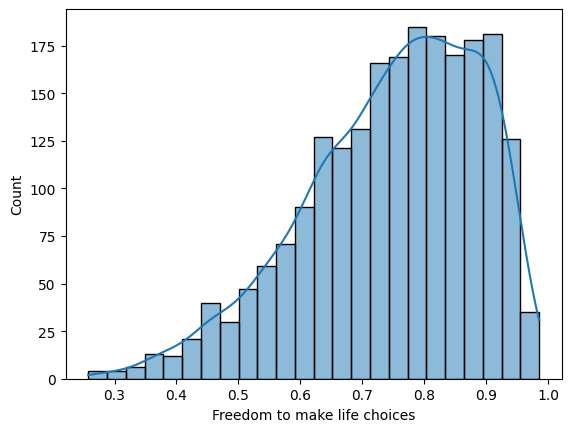

In [31]:
sns.histplot(df['Freedom to make life choices'], kde=True)

In [50]:
df['Freedom to make life choices'].skew()

-0.6705383696711781

In [51]:
df['Freedom to make life choices'].kurt()

-0.03478504567633589

### Generosity

Generosity is closer to a normal distribution with a kurtosis of .83, and different from other columns it has a positive skew, indicating the tail is towards the right towards positive values.  It seems that in many countries people aren't very generous.

<Axes: xlabel='Generosity', ylabel='Count'>

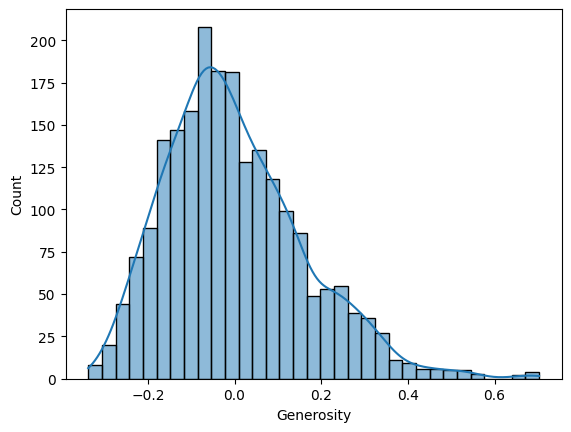

In [32]:
sns.histplot(df.Generosity, kde=True)

In [52]:
df.Generosity.skew()

0.7770869685066418

In [53]:
df.Generosity.kurt()

0.8315897969858366

### Perceptions of corruption

Perception of corruption is closer to a normal distribution with a kurtosis of 1.81, but it is also heavily skewed to the left.  Seems that many countries have a high perception of corruption, and not being percieved as corrupt is much less common.

<Axes: xlabel='Perceptions of corruption', ylabel='Count'>

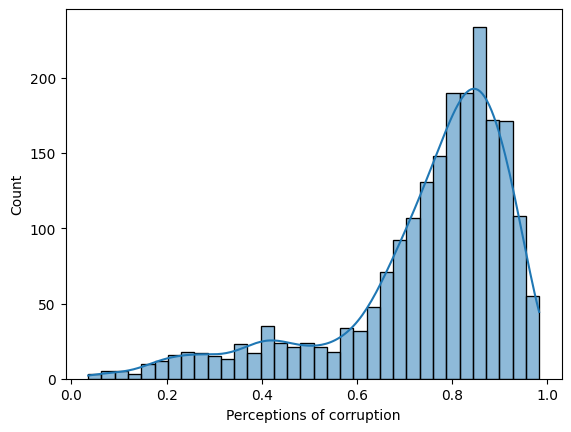

In [33]:
sns.histplot(df['Perceptions of corruption'], kde=True)

In [54]:
df['Perceptions of corruption'].skew()

-1.4904178416399556

In [55]:
df['Perceptions of corruption'].kurt()

1.814231483430651

### Positive affect

Similar to many of the other columns, not normally distributed (grouped towards the middle) and with some skew to the left.

<Axes: xlabel='Positive affect', ylabel='Count'>

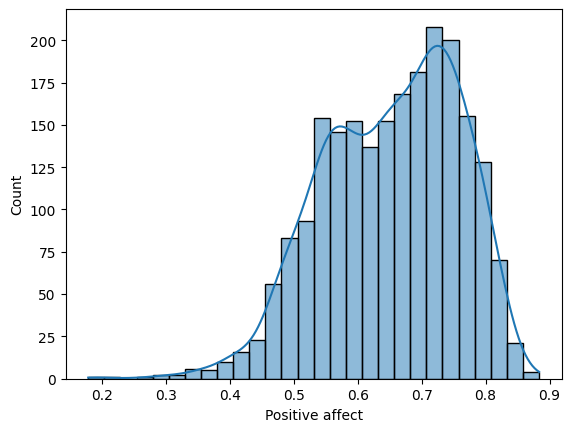

In [34]:
sns.histplot(df['Positive affect'], kde=True)

In [56]:
df['Positive affect'].skew()

-0.43620485037840157

In [57]:
df['Positive affect'].kurt()

-0.20781810467888429

### Negative affect

Negative affect is closer to a normal distribution with a kurtosis of .76, but is is also right skewed with a skew of .73.

<Axes: xlabel='Negative affect', ylabel='Count'>

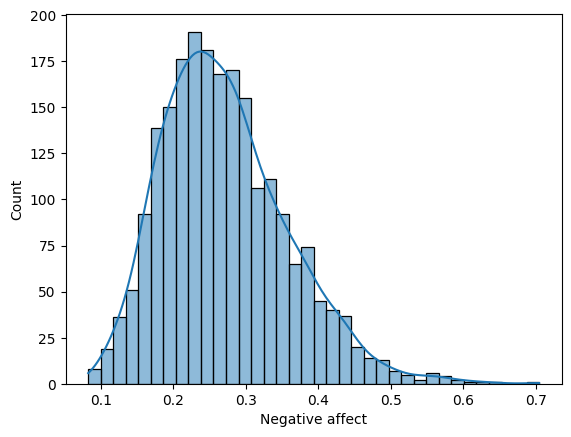

In [35]:
sns.histplot(df['Negative affect'], kde=True)

In [58]:
df['Negative affect'].skew()

0.731082575316055

In [59]:
df['Negative affect'].kurt()

0.7573999281385189

## Bivariate relationships

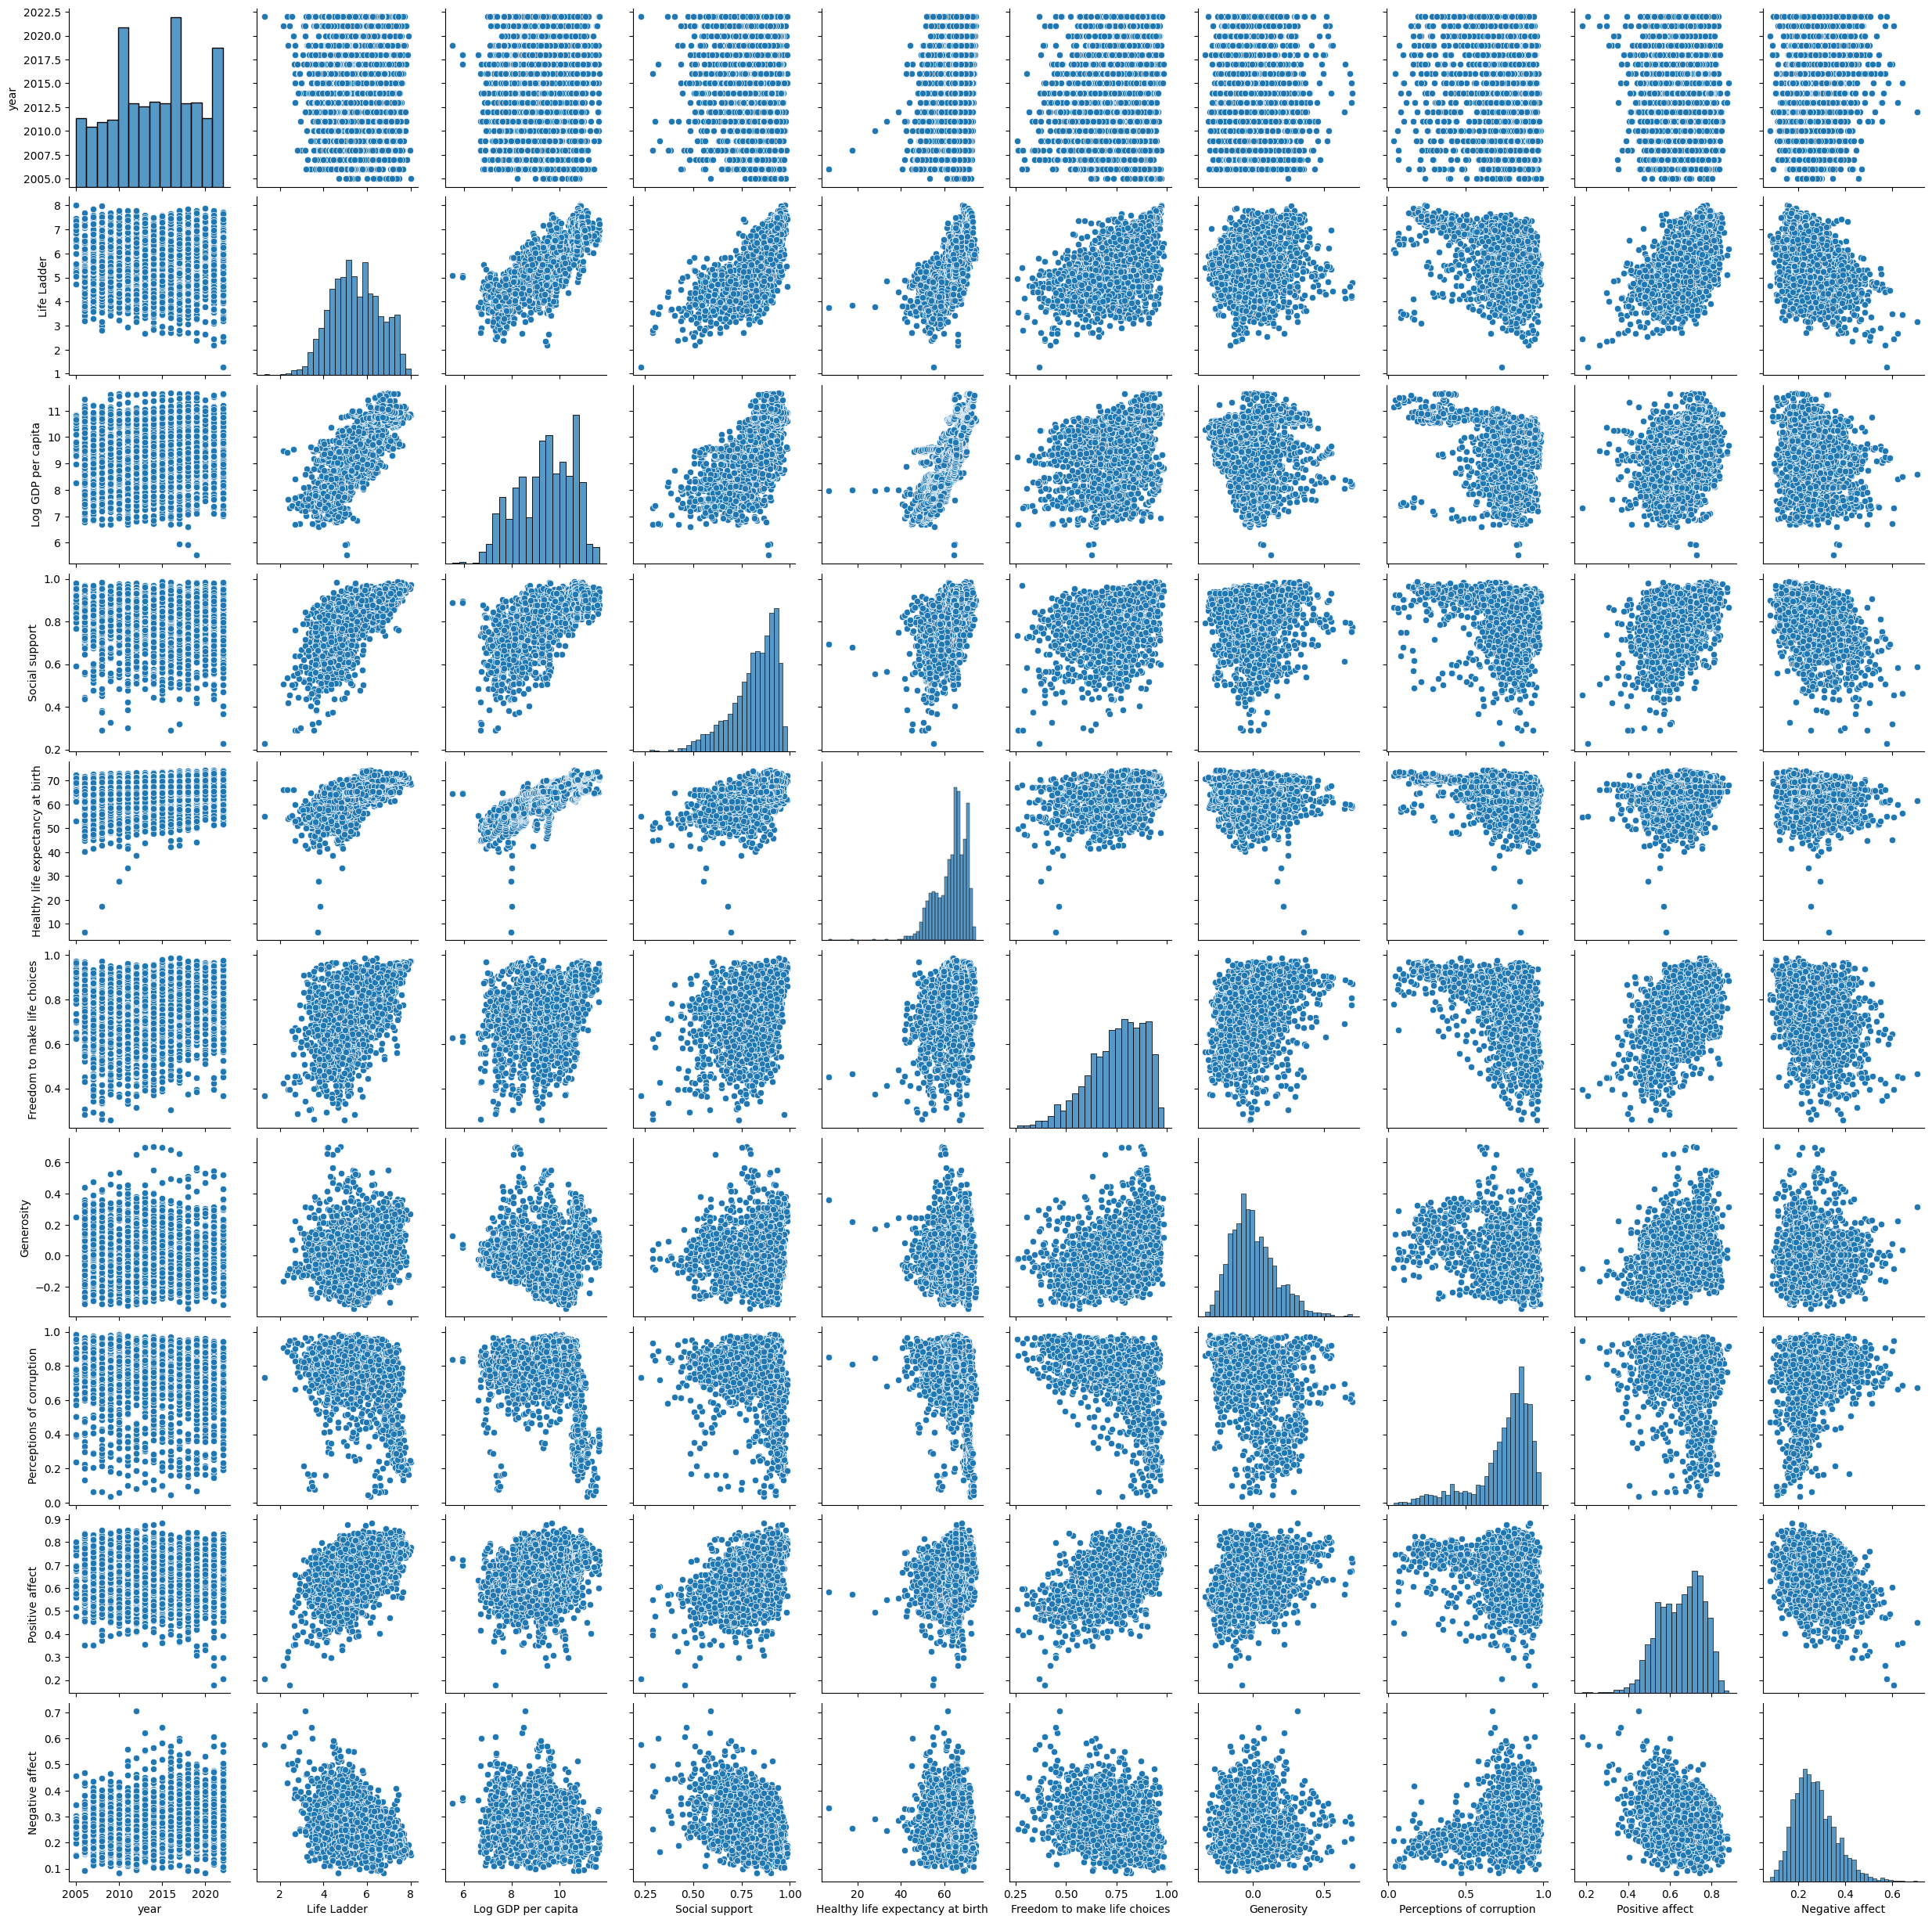

In [5]:
sns.pairplot(df)

<Axes: >

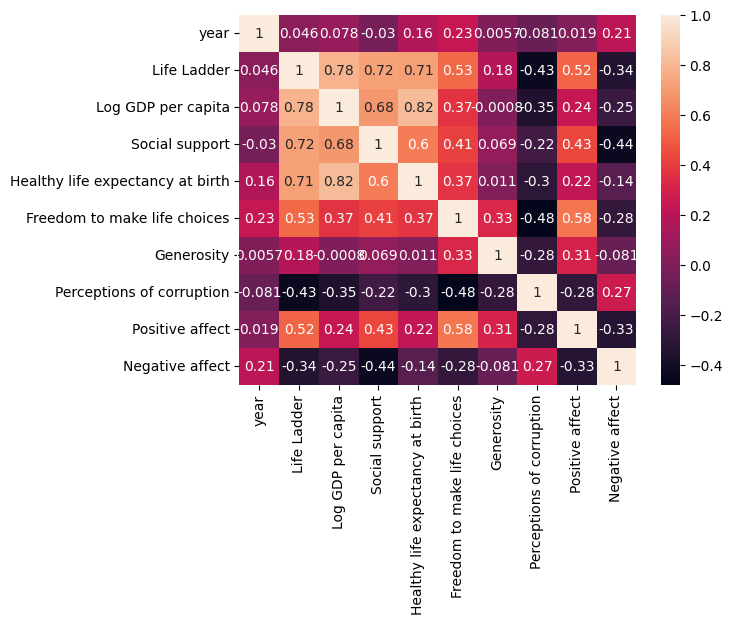

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

As can be seen in the pairplot and heat map, there seems to be linear correlations of varying strengths between Life Ladder (happiness), and many of the other columns including:
* Log GDP per capita (.78)
* Social support (.72)
* Healthy life expectancy at birth (.71)
* Freedom to make life choices (.53)
* Positive affect (.52)
* Negative affect (-0.34)
* Perceptions of corruption (-0.43)

It's also interesting to note that the correlation between generosity and happiness is very small.


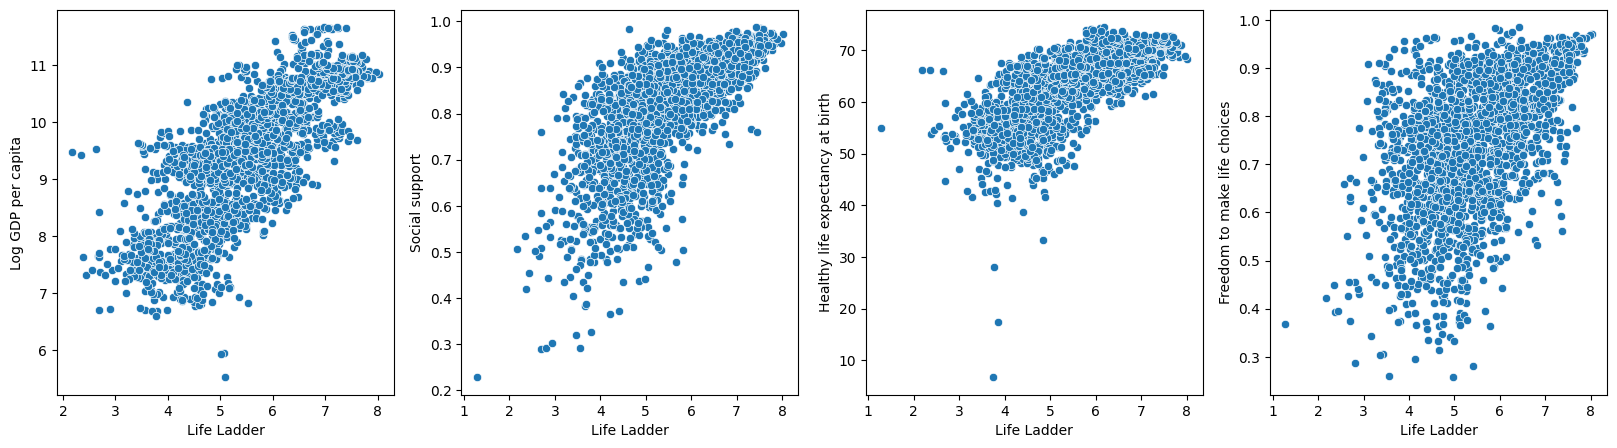

In [69]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
sns.scatterplot(df, x='Life Ladder', y='Log GDP per capita', ax=axs[0])
sns.scatterplot(df, x='Life Ladder', y='Social support', ax=axs[1])
sns.scatterplot(df, x='Life Ladder', y='Healthy life expectancy at birth', ax=axs[2])
sns.scatterplot(df, x='Life Ladder', y='Freedom to make life choices', ax=axs[3])
plt.show()

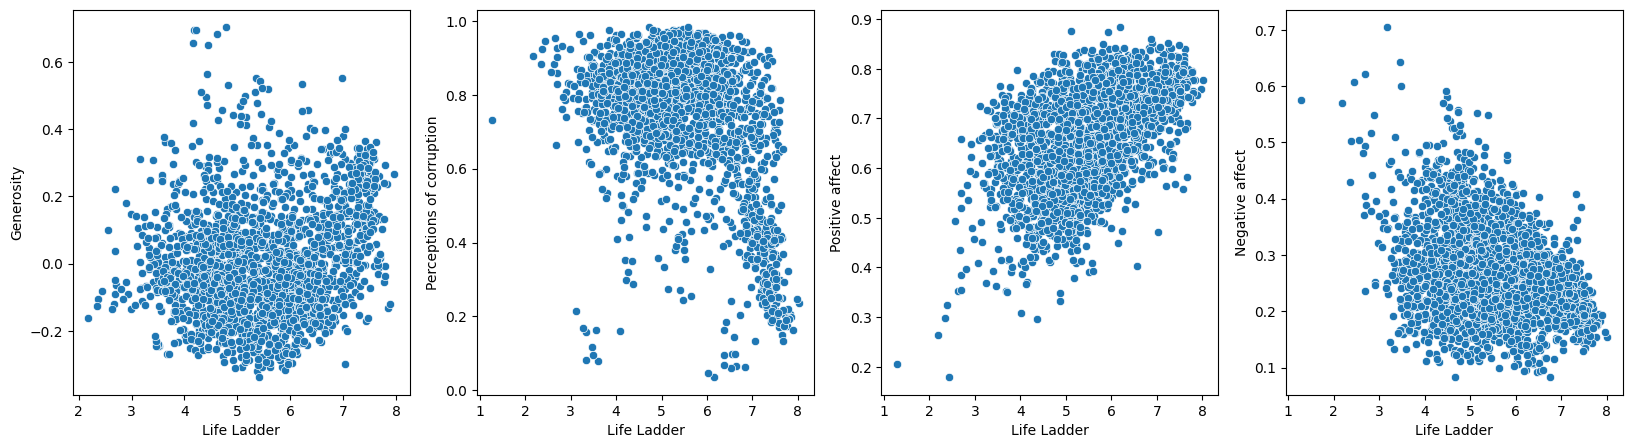

In [72]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
sns.scatterplot(df, x='Life Ladder', y='Generosity', ax=axs[0])
sns.scatterplot(df, x='Life Ladder', y='Perceptions of corruption', ax=axs[1])
sns.scatterplot(df, x='Life Ladder', y='Positive affect', ax=axs[2])
sns.scatterplot(df, x='Life Ladder', y='Negative affect', ax=axs[3])
plt.show()

Another interesting note, Life Ladder and Log GDP per capita seem to be covariant. (money *can* buy happiness?)

Also, Log GDP per capita and life expectancy are very highly correlated, with some outliers that can be ignored (the ones from Haiti).  Also some other outliers coming from Venezuela, which is interesting.

<Axes: xlabel='Log GDP per capita', ylabel='Healthy life expectancy at birth'>

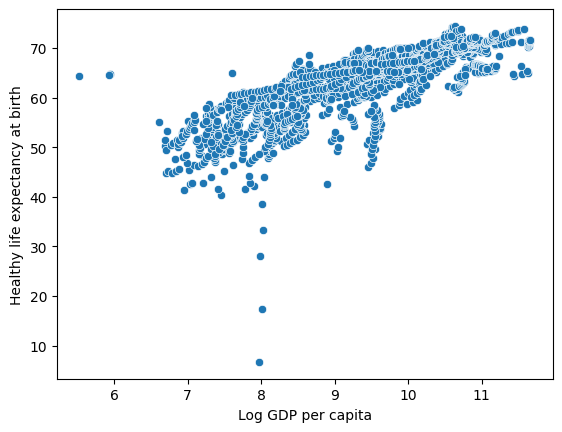

In [73]:
sns.scatterplot(df, x='Log GDP per capita', y='Healthy life expectancy at birth')

In [74]:
df[df['Log GDP per capita'] < 6.2]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
2132    Venezuela  2017     5.070751            5.943209        0.895879   
2133    Venezuela  2018     5.005663            5.935122        0.886882   
2134    Venezuela  2019     5.080803            5.526723        0.887672   

      Healthy life expectancy at birth  Freedom to make life choices  \
2132                         64.750000                      0.635505   
2133                         64.574997                      0.610855   
2134                         64.400002                      0.625526   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
2132    0.054434                   0.843969         0.697486         0.362985  
2133    0.072312                   0.827560         0.723260         0.373658  
2134    0.128371                   0.839340         0.729553         0.350950

<Axes: xlabel='year', ylabel='Healthy life expectancy at birth'>

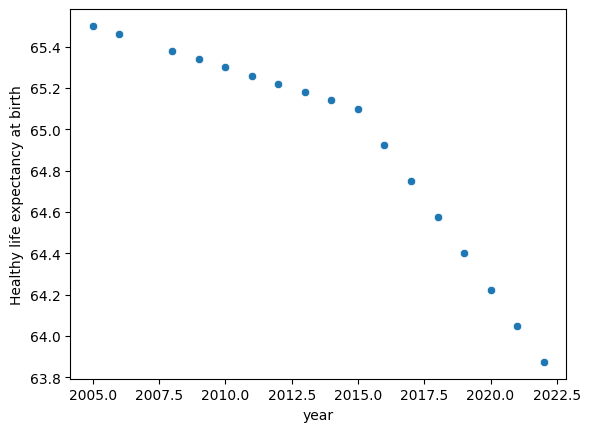

In [75]:
# Another case where the reports extrapolation of life expectancy can be seen
# with a perfect linear decrease in life expectancy
sns.scatterplot(df[df['Country name'] == 'Venezuela'], x='year', y='Healthy life expectancy at birth')

Another interesting correlation is between positive affect (experiencing positive emotions) and Freedom to make life choices.

<Axes: xlabel='Positive affect', ylabel='Freedom to make life choices'>

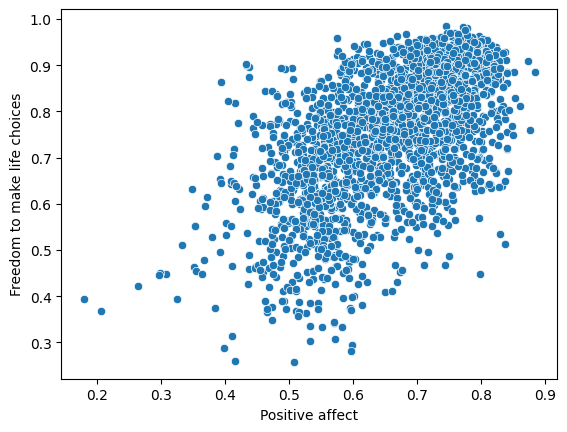

In [81]:
sns.scatterplot(df, x='Positive affect', y='Freedom to make life choices')

### Recommendations/Would like to see's
* Find a better source for life expectancy data, linear extrapolation with such limited starting data points is causing strange-looking results to show up for life expectancy
* If the dataset is used as-is, be aware that some countries only have data for a single year

# Question 2

#### Happiest country in 2022: Finland

In [7]:
df[df['Life Ladder'] == df[df.year == 2022]['Life Ladder'].max()]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
637      Finland  2022     7.728998           10.814193        0.974395   

     Healthy life expectancy at birth  Freedom to make life choices  \
637                         71.224998                      0.958609   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
637    0.102147                   0.190207         0.741323         0.191473

#### Happiest country in 2013: Canada

In [8]:
df[df['Life Ladder'] == df[df.year == 2013]['Life Ladder'].max()]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
334       Canada  2013     7.593794           10.751601        0.936239   

     Healthy life expectancy at birth  Freedom to make life choices  \
334                         70.980003                      0.916014   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
334    0.311748                   0.406236         0.800634          0.26285

#### Happiest country of all time: Denmark in 2005

In [9]:
df[df['Life Ladder'] == df['Life Ladder'].max()]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
505      Denmark  2005     8.018934           10.849012        0.972372   

     Healthy life expectancy at birth  Freedom to make life choices  \
505                         68.300003                      0.971135   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
505         NaN                   0.236522         0.776689         0.153672

#### Least happy country in 2022: Afghanistan

In [10]:
df[df['Life Ladder'] == df[df.year == 2022]['Life Ladder'].min()]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
13  Afghanistan  2022     1.281271                 NaN        0.228217   

    Healthy life expectancy at birth  Freedom to make life choices  \
13                            54.875                      0.368377   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
13         NaN                   0.733198         0.205868         0.575512

#### Least happy country in 2013: Syria

In [11]:
df[df['Life Ladder'] == df[df.year == 2013]['Life Ladder'].min()]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
1883        Syria  2013     2.687553            8.418935         0.58545   

      Healthy life expectancy at birth  Freedom to make life choices  \
1883                             59.82                      0.454883   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
1883    0.221555                   0.663431         0.353619          0.62223

#### Least happy country of all time: Afghanistan in 2022

In [12]:
df[df['Life Ladder'] == df['Life Ladder'].min()]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
13  Afghanistan  2022     1.281271                 NaN        0.228217   

    Healthy life expectancy at birth  Freedom to make life choices  \
13                            54.875                      0.368377   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
13         NaN                   0.733198         0.205868         0.575512

# Question 3

In [13]:
happiness_changes = []

for country in df['Country name'].value_counts().index: # use value_counts to get all the country names included in the dataset
    country_rows = df[df['Country name'] == country]    # get all the rows for each country
                                                        
    if country_rows.year.max() != 2022:                 # check to see if the country has an entry for 2022
        continue
    
    happiness_22 = country_rows[country_rows.year == country_rows.year.max()]['Life Ladder'].values[0]       # get 2022 happiness
    happiness_earliest = country_rows[country_rows.year == country_rows.year.min()]['Life Ladder'].values[0] # get earliest happiness
    change = happiness_22 - happiness_earliest                                                               # calculate change in happiness
    earliest_year = country_rows.year.min()                                                                  # get earliest year
    happiness_changes.append([country, change, happiness_22, happiness_earliest, earliest_year])

happiness_changes = pd.DataFrame(happiness_changes, columns=['Country name', 'Ladder delta', '2022 Happiness', 'Earliest Happiness', 'Earliest year'])
happiness_changes

# references
# https://stackoverflow.com/questions/16729574/how-can-i-get-a-value-from-a-cell-of-a-dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

Country name  Ladder delta  2022 Happiness  Earliest Happiness  \
0       Zimbabwe     -0.530049        3.296220            3.826268   
1        Vietnam      0.972849        6.266509            5.293660   
2       Tanzania     -0.306639        3.615845            3.922484   
3       Thailand      0.121685        6.007117            5.885433   
4     Bangladesh     -0.911377        3.407532            4.318909   
..           ...           ...             ...                 ...   
109    Mauritius      0.263428        5.740501            5.477073   
110      Jamaica     -0.337693        5.870189            6.207882   
111      Namibia      0.063375        4.948963            4.885587   
112      Comoros      0.069176        3.545204            3.476027   
113       Gambia      0.161502        4.279441            4.117939   

     Earliest year  
0             2006  
1             2006  
2             2006  
3             2006  
4             2006  
..             ...  
109           2011  
110           2006  
111           2007  
112           2009  
113           2017  

[114 rows x 5 columns]

#### Largest increase in happiness: Congo (Brazzaville)

In [14]:
happiness_changes[happiness_changes['Ladder delta'] == happiness_changes['Ladder delta'].max()]

Country name  Ladder delta  2022 Happiness  Earliest Happiness  \
93  Congo (Brazzaville)      1.985126        5.804919            3.819792   

    Earliest year  
93           2008

#### Largest decrease in happiness: Lebanon

In [15]:
happiness_changes[happiness_changes['Ladder delta'] == happiness_changes['Ladder delta'].min()]

Country name  Ladder delta  2022 Happiness  Earliest Happiness  \
23      Lebanon     -3.138818        2.352428            5.491245   

    Earliest year  
23           2005